<a href="https://colab.research.google.com/github/marypinzon13/data-analytics-challenge/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
#Graph 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Normalizing data
from sklearn.preprocessing import MinMaxScaler 

# Label encoding
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# Spliting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
ls

drive/  measurements2.xlsx  measurements.csv  sample_data/


# **EXPLORY DATA ANALYSIS**


GET TO KNOW THE DOMAIN

In [6]:
data = pd.read_excel("measurements2.xlsx")
display(data.shape)
print(data.head())

(388, 12)

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


EXPLORE YOUR DATA

In [8]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [11]:
null_values = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
null_values

,0
distance,0.00
consume,0.00
speed,0.00
temp_inside,3.09
temp_outside,0.00
specials,76.03
gas_type,0.00
AC,0.00
rain,0.00
sun,0.00


In [14]:
data['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [15]:
data['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [16]:
data['refill liters'].value_counts(dropna=False)

NaN     375
45.0      2
37.7      2
39.0      2
37.6      1
38.0      1
38.3      1
10.0      1
41.0      1
37.0      1
37.2      1
Name: refill liters, dtype: int64

In [17]:
data['refill gas'].value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill gas, dtype: int64

CLEAN YOUR DATA

In [18]:
columns = []
for i in range (len(data.columns)):
    columns.append(data.columns[i].lower().replace(" ", "_"))
data.columns = columns 
data.head() 

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


I will go to remove specials, refill liters and refill gas because there are a lot of missing values.

In [19]:
data = data.drop(['specials','refill_liters','refill_gas'], axis = 1)
data.dropna(subset=['temp_inside'],inplace = True)

In [20]:
null_value = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
null_value

,0
distance,0.0
consume,0.0
speed,0.0
temp_inside,0.0
temp_outside,0.0
gas_type,0.0
ac,0.0
rain,0.0
sun,0.0


TAKE A LOOK AND FIND CONNECTIONS BETWEEN DATA

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   ac            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 29.4+ KB


In [25]:
# check numerical columns
numerical = data.select_dtypes(include=np.number)
numerical.head(10)

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
5,8.3,6.4,50,21.5,10,0,0,0
6,7.8,4.4,43,21.5,11,0,0,0
7,12.3,5.0,40,21.5,6,0,0,0
8,4.9,6.4,26,21.5,4,0,0,0
9,11.9,5.3,30,21.5,9,0,0,0


In [26]:
# check the categorical columns
categorical = data.select_dtypes('object')
categorical.head(10)

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
5,E10
6,E10
7,E10
8,E10
9,E10


In [27]:
categorical.value_counts()

gas_type
SP98        219
E10         157
dtype: int64

Matriz correlation

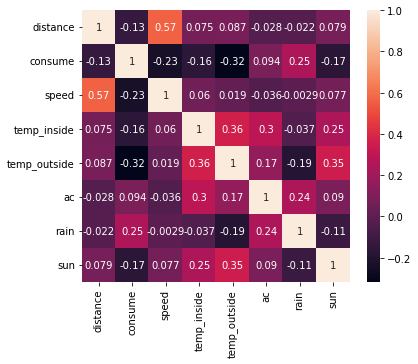

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(numerical.corr(), annot = True)
plt.show()

# **VISUALIZATION**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9157d7b590>,
      dtype=object)

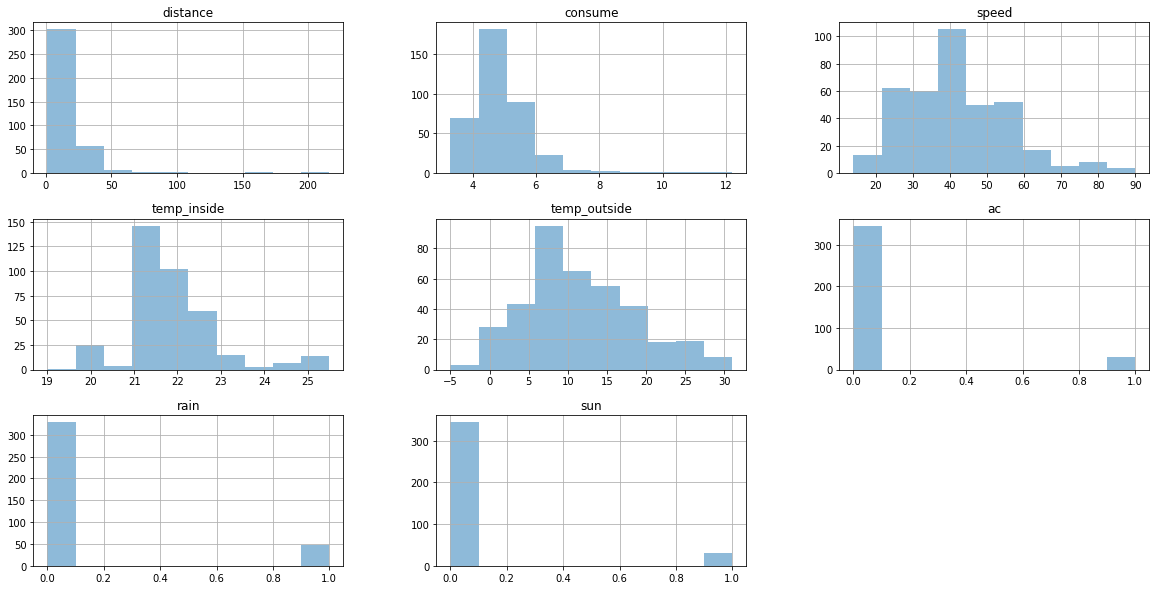

In [32]:
# histogram information
numerical.hist(alpha=0.5, figsize=(20, 10))

In [35]:
# Analisys distance and spped

fig = px.bar(numerical, x='distance', y='speed',
            color="consume", title="Bar Graph\n Distance vs Speed")
fig.show()

# **PREDICTION**

In [36]:
# Sets for each colum the minimum = 0 and the maximum = 1
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(numerical) # fit() Determine the min and the max of each column
x_normalized = MinMaxtransformer.transform(numerical) # .transform() applies the transformation x_normalized will be np.array
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=numerical.columns) # Take the column's names from X_num
x_normalized.head()

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (376, 8)


,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,0.124302,0.191011,0.157895,0.384615,0.472222,0.0,0.0,0.0
1,0.049814,0.101124,0.210526,0.384615,0.500000,0.0,0.0,0.0
2,0.046089,0.247191,0.315789,0.384615,0.555556,0.0,0.0,0.0
3,0.054004,0.067416,0.289474,0.384615,0.527778,0.0,0.0,0.0
4,0.080074,0.134831,0.421053,0.384615,0.555556,0.0,0.0,0.0


In [37]:
# Training data
y = categorical['gas_type']
X = numerical

In [38]:
X.shape, y.shape

((376, 8), (376,))

In [41]:
# 30 percent the test data (0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.5752212389380531

# **EVALUATION**

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[15, 33],
       [15, 50]])